In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [15]:
# Print the feature names
print("Feature names:", cancer.feature_names)
# Print the target names
print("Target names:", cancer.target_names)


Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


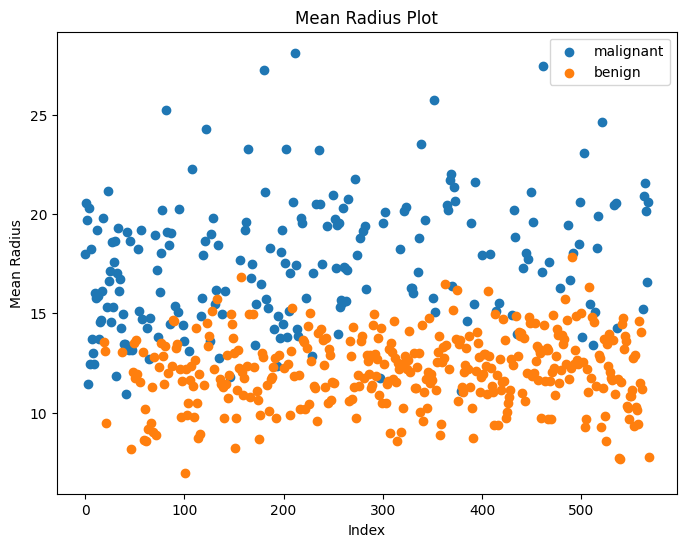

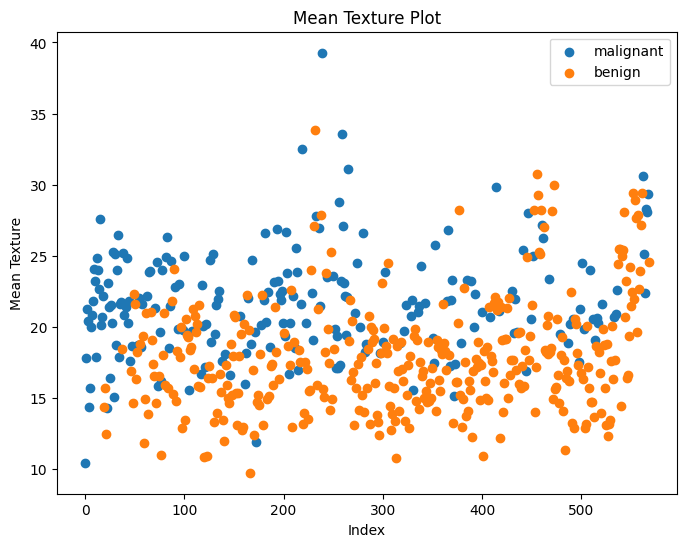

In [16]:
# Extract the mean radius feature and target names
mean_radius = cancer.data[:, 0]
target_names = cancer.target_names
target = cancer.target

# Create the scatter plot
plt.figure(figsize=(8, 6))
for i in range(len(target_names)):
  plt.scatter(np.where(target==i)[0], mean_radius[target==i], label=target_names[i])
plt.xlabel("Index")
plt.ylabel("Mean Radius")
plt.title("Mean Radius Plot")
plt.legend()
plt.show()

# Extract the mean texture feature and target names
mean_texture = cancer.data[:, 1]

# Create the scatter plot
plt.figure(figsize=(8, 6))
for i in range(len(target_names)):
  plt.scatter(np.where(target==i)[0], mean_texture[target==i], label=target_names[i])
plt.xlabel("Index")
plt.ylabel("Mean Texture")
plt.title("Mean Texture Plot")
plt.legend()
plt.show()


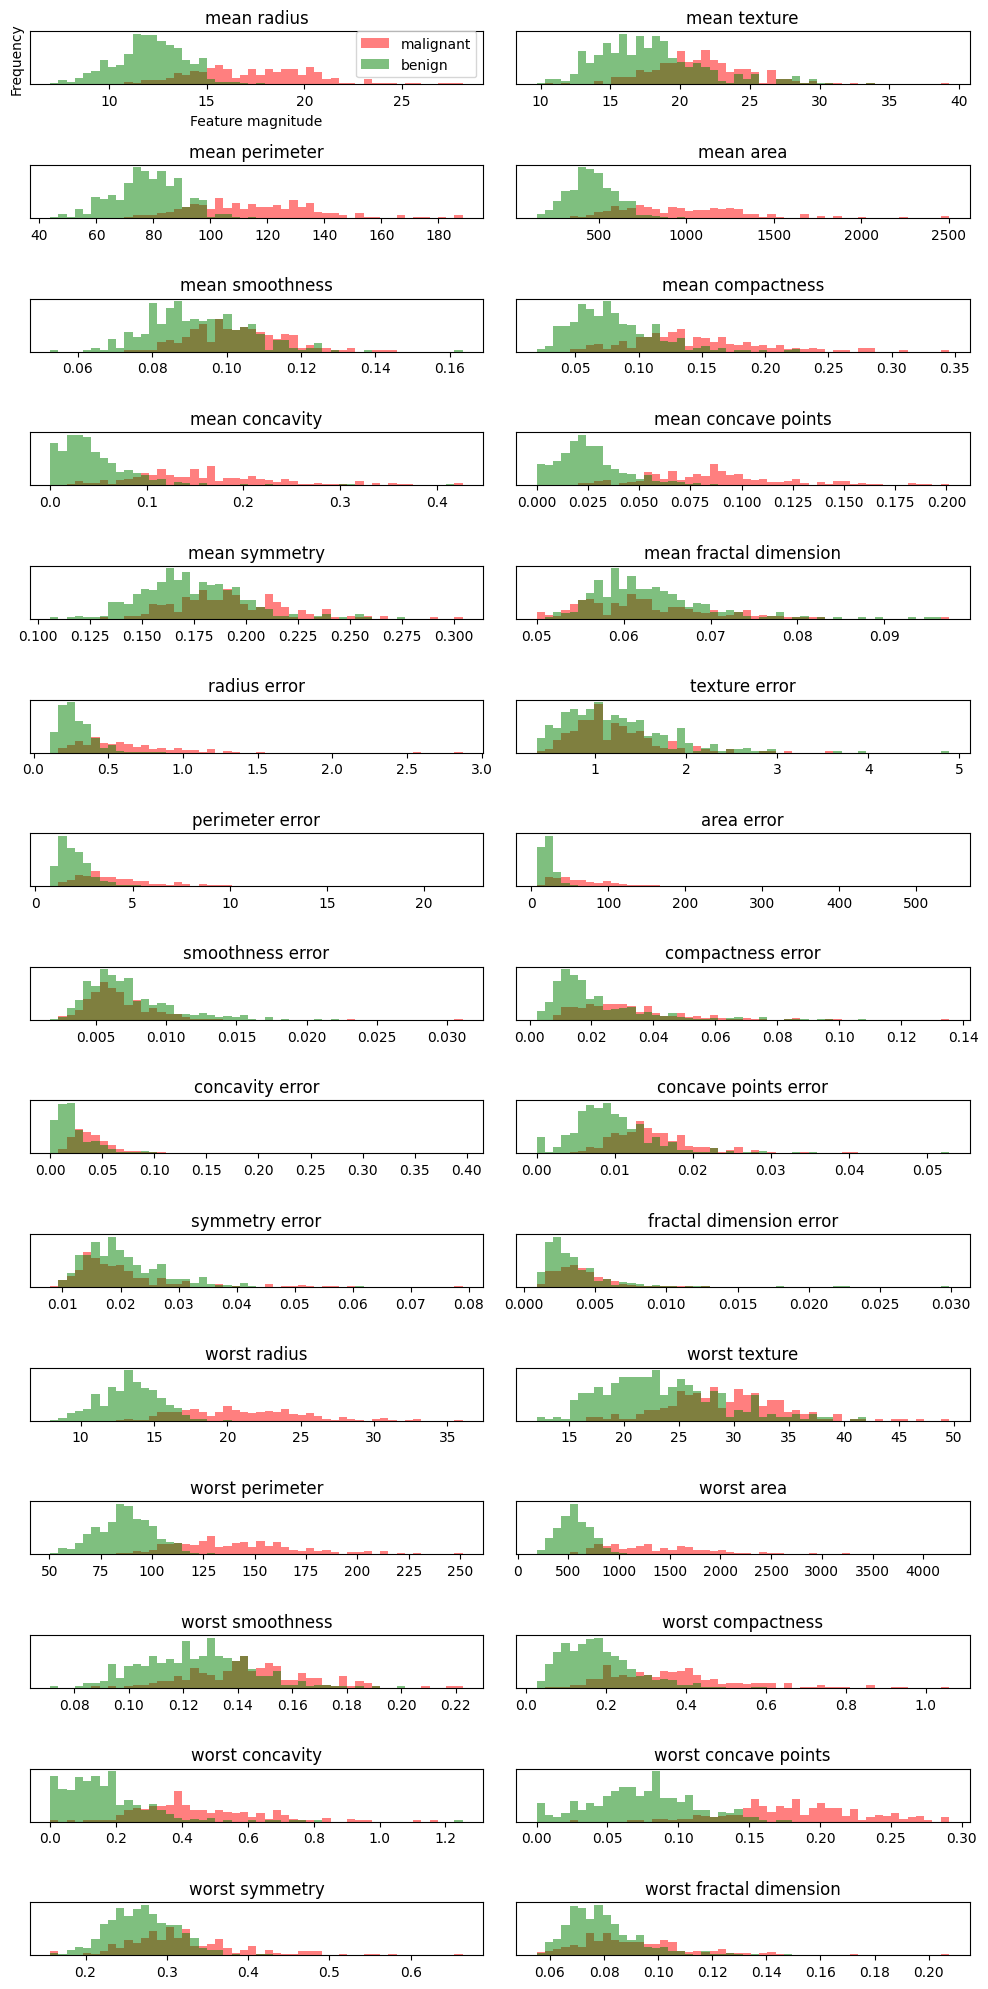

In [17]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='red', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='green', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()


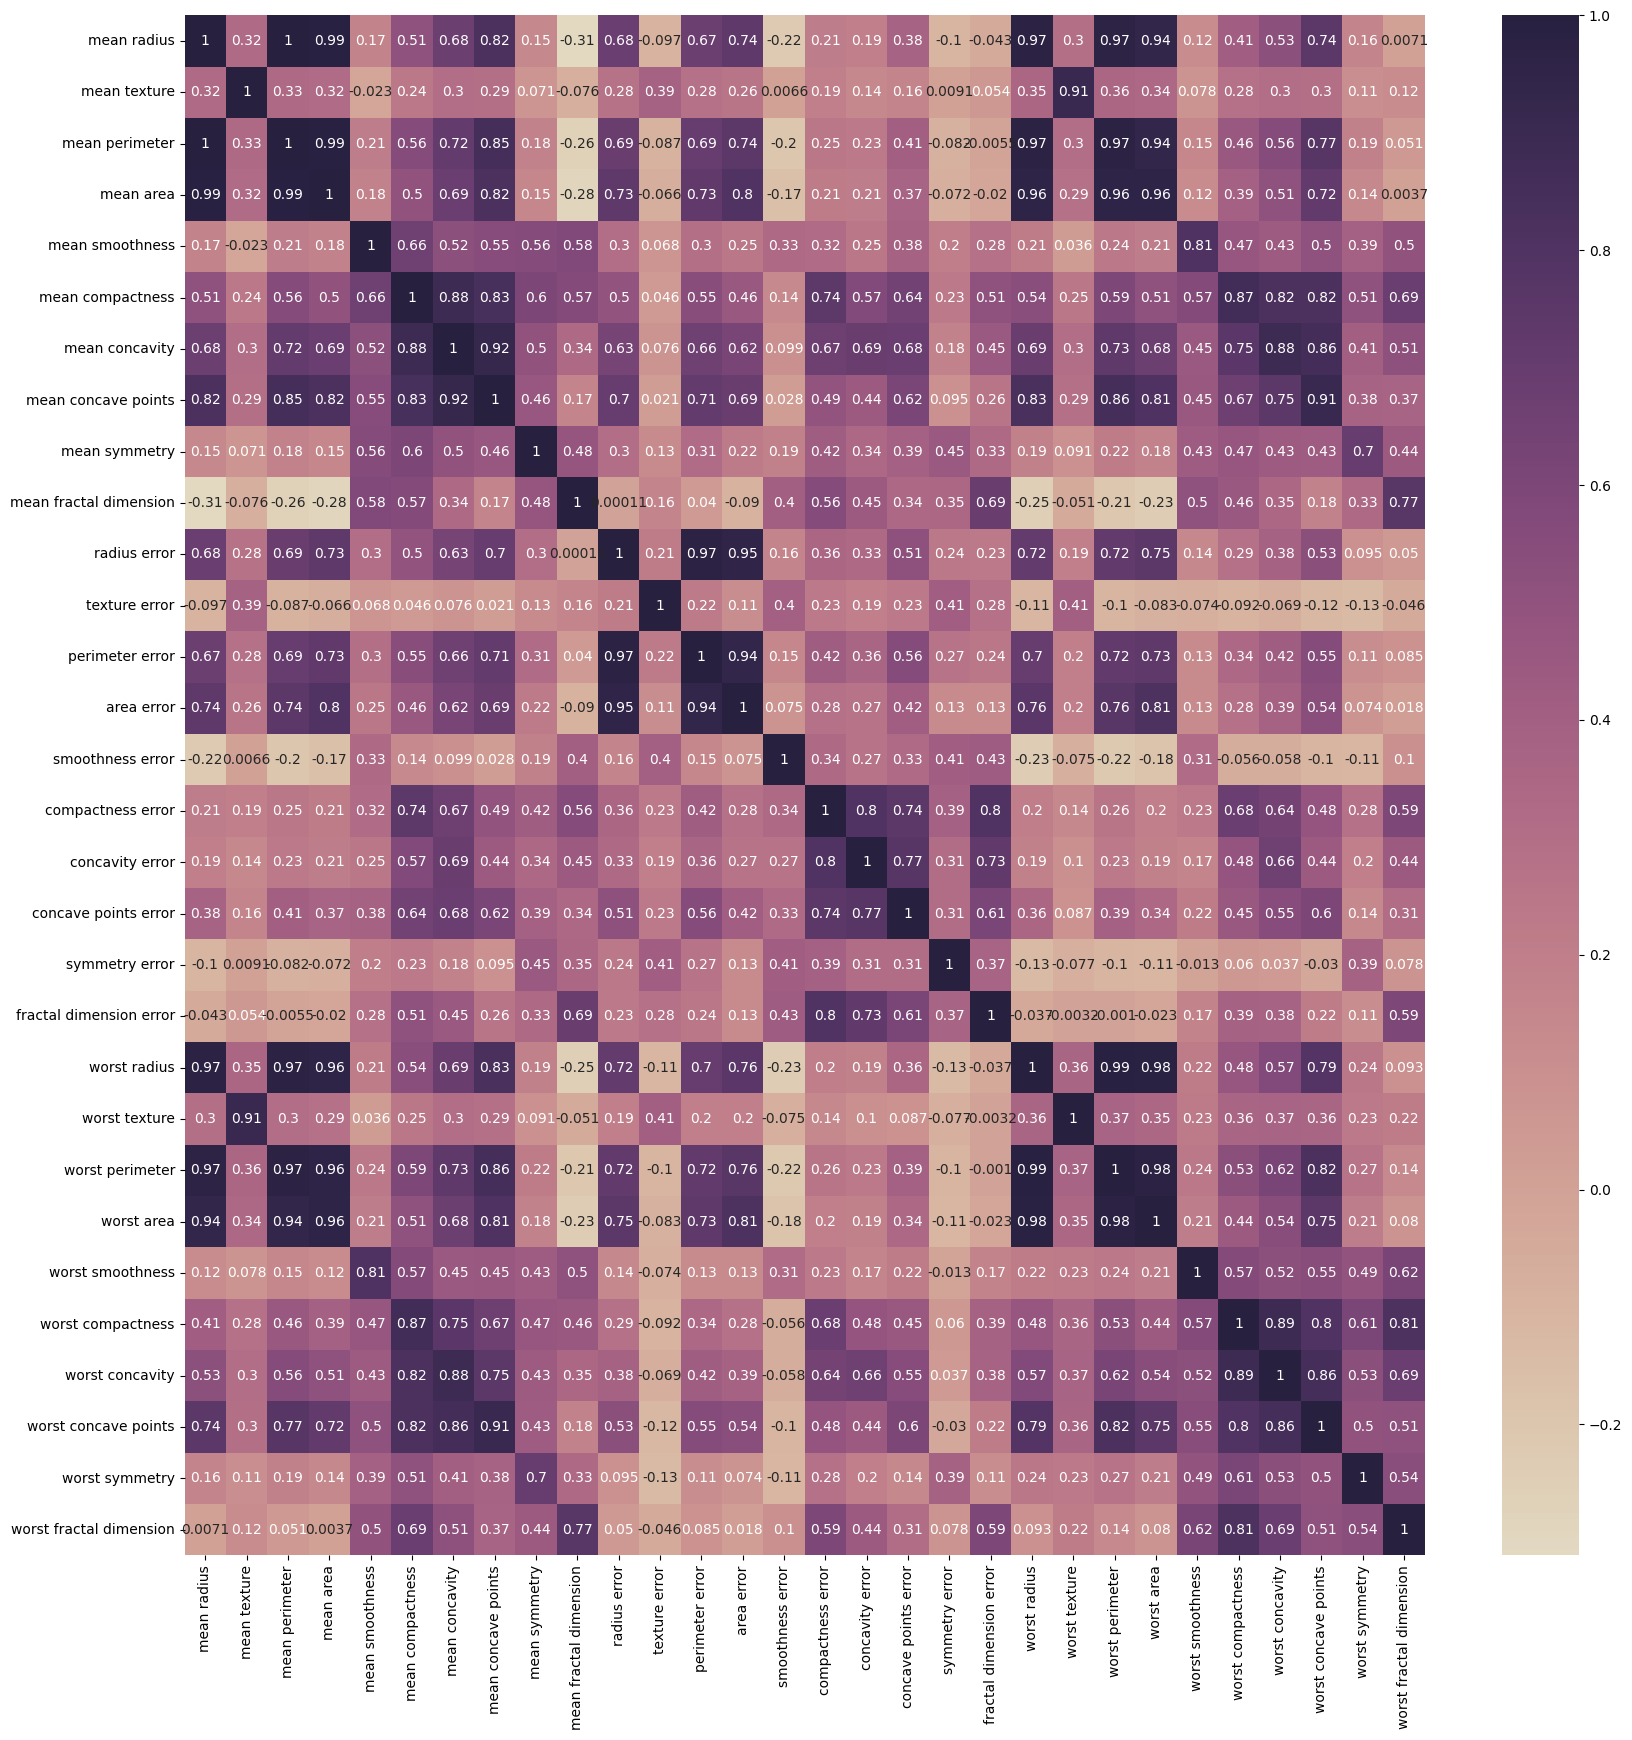

In [18]:
import pandas as pd
import seaborn as sns
# Create a Pandas DataFrame from the cancer dataset
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# Calculate the correlation matrix
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)


In [20]:

from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (569, 30)
Reduced shape: (569, 2)


In [21]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

Text(0, 0.5, 'Second principal component')

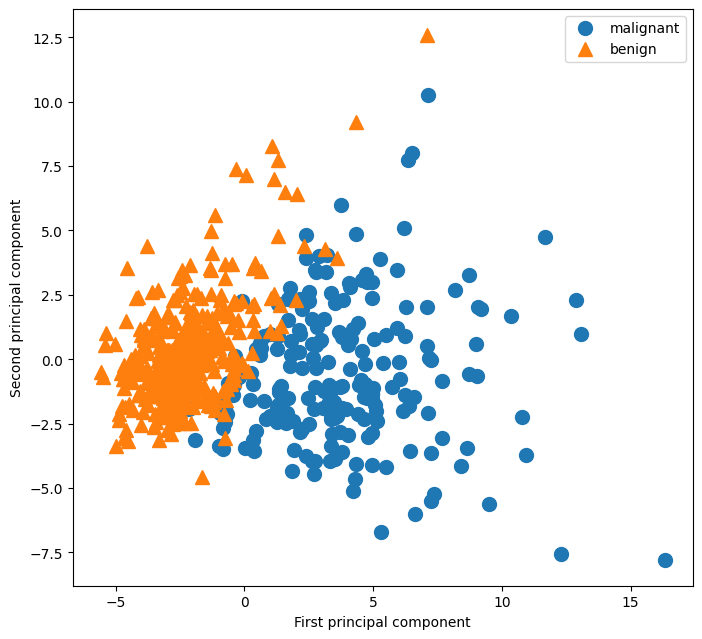

In [22]:
import matplotlib as mpl
# plot first vs. second principal component, colored by class
def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    ax = plt.gca()
    unique_y = np.unique(y)
    markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10
    labels = unique_y
    lines = []
    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        color = cycle['color']
        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color))
    pad1 = x1.std() * 0.2
    pad2 = x2.std() * 0.2
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
    ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))
    return lines

plt.figure(figsize=(8, 8))
discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


In [23]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

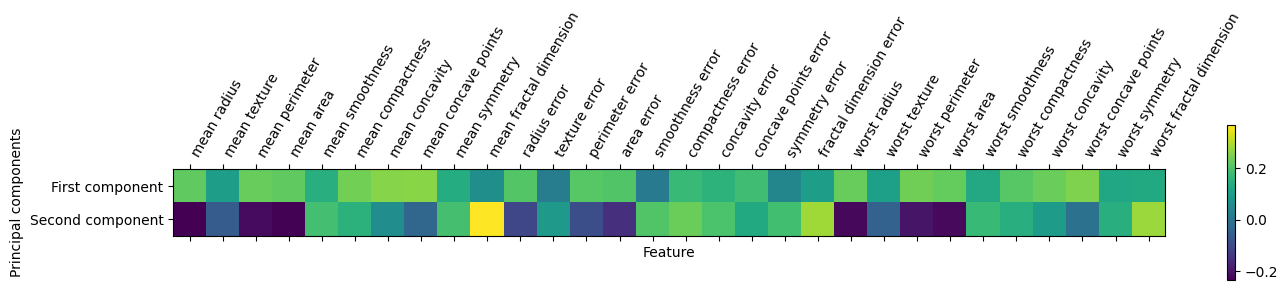

In [24]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")


In [25]:
pca = PCA(n_components=0.95) # keep components that explain 95% of variance
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
print("Total explained variance: {}".format(str(sum(pca.explained_variance_ratio_))))


Original shape: (569, 30)
Reduced shape: (569, 10)
Total explained variance: 0.9515688143366667


# Homework Question

Python code to compare the performance of the SGD classifier before and after applying PCA on the breast cancer dat

In [26]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Train SGD Classifier on original data (before PCA)
sgd_before_pca = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_before_pca.fit(X_train_scaled, y_train)
y_pred_before = sgd_before_pca.predict(X_test_scaled)
accuracy_before = accuracy_score(y_test, y_pred_before)

print(f"Accuracy before PCA: {accuracy_before:.4f}")

# 2. Apply PCA to reduce dimensions while retaining 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SGD Classifier on PCA-transformed data (after PCA)
sgd_after_pca = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_after_pca.fit(X_train_pca, y_train)
y_pred_after = sgd_after_pca.predict(X_test_pca)
accuracy_after = accuracy_score(y_test, y_pred_after)

print(f"Accuracy after PCA: {accuracy_after:.4f}")

# Compare results
if accuracy_after > accuracy_before:
    print("PCA improved the performance of the SGD Classifier.")
elif accuracy_after < accuracy_before:
    print("Performance was better without PCA.")
else:
    print("No significant difference in performance before and after PCA.")

Accuracy before PCA: 0.9825
Accuracy after PCA: 0.9708
Performance was better without PCA.
